In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#!pip install pandas_profiling

In [3]:
#!pip install sweetviz

In [4]:
from google.colab import files
uploaded = files.upload()

Saving iphone.csv to iphone.csv


In [5]:
import io
ip7 = pd.read_csv(io.BytesIO(uploaded['iphone.csv']))

In [6]:
ip7

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
0,0,Bharath Kumar,7 March 2019,5.0 out of 5 stars,i received defective iphone 7 32GB silver co...,Wow
1,1,jaywant,29 October 2018,1.0 out of 5 stars,Thanks for Amazon service. phone is very nic...,Pros & Cons
2,2,jaywant,29 October 2018,1.0 out of 5 stars,"Redmi phones cameras are great, of course iP...",In just three months phone developed Hardware ...
3,3,Bharath Kumar,7 March 2019,5.0 out of 5 stars,If you are an apple fan !! This is a true be...,Not worth it in 2021
4,4,Utpal Das,13 November 2018,5.0 out of 5 stars,in 20 days i found my battery health 98% whi...,Not good for the price
...,...,...,...,...,...,...
5347,5347,Tushar_Amazon,31 March 2021,3.0 out of 5 stars,NaN,NaN
5348,5348,Rijo Thomas,4 April 2021,1.0 out of 5 stars,NaN,NaN
5349,5349,Anonymous,20 February 2021,1.0 out of 5 stars,NaN,NaN
5350,5350,PRINCE INDRAJIT LAW / LAHA.,16 February 2021,5.0 out of 5 stars,NaN,NaN


In [7]:
ip7.head(10)

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
0,0,Bharath Kumar,7 March 2019,5.0 out of 5 stars,i received defective iphone 7 32GB silver co...,Wow
1,1,jaywant,29 October 2018,1.0 out of 5 stars,Thanks for Amazon service. phone is very nic...,Pros & Cons
2,2,jaywant,29 October 2018,1.0 out of 5 stars,"Redmi phones cameras are great, of course iP...",In just three months phone developed Hardware ...
3,3,Bharath Kumar,7 March 2019,5.0 out of 5 stars,If you are an apple fan !! This is a true be...,Not worth it in 2021
4,4,Utpal Das,13 November 2018,5.0 out of 5 stars,in 20 days i found my battery health 98% whi...,Not good for the price
5,5,Rishabh,10 March 2019,5.0 out of 5 stars,Totally disappointed within a month paint st...,Poor performance
6,6,zishan ali,29 July 2020,1.0 out of 5 stars,First of all one would want to know is the p...,Cheating product
7,7,mohammad n.,23 January 2020,1.0 out of 5 stars,Very good specs which can handle updates for...,Don’t buy
8,8,Keshav Singh,18 October 2018,5.0 out of 5 stars,Everything is awesome when it comes to an ip...,Very Good!
9,9,Vikram Nayak,13 May 2019,5.0 out of 5 stars,This iPhone7 is in hearing problems. What Ca...,Too expensive


In [8]:
ip7.tail(10)

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
5342,5342,Balwant singh,22 March 2021,5.0 out of 5 stars,NaN,NaN
5343,5343,Jijo,28 May 2020,5.0 out of 5 stars,NaN,NaN
5344,5344,S. G.,17 April 2021,1.0 out of 5 stars,NaN,NaN
5345,5345,Valentino Pereira,9 May 2021,4.0 out of 5 stars,NaN,NaN
5346,5346,Madhulika,27 April 2021,5.0 out of 5 stars,NaN,NaN
5347,5347,Tushar_Amazon,31 March 2021,3.0 out of 5 stars,NaN,NaN
5348,5348,Rijo Thomas,4 April 2021,1.0 out of 5 stars,NaN,NaN
5349,5349,Anonymous,20 February 2021,1.0 out of 5 stars,NaN,NaN
5350,5350,PRINCE INDRAJIT LAW / LAHA.,16 February 2021,5.0 out of 5 stars,NaN,NaN
5351,5351,Deepak,22 February 2021,1.0 out of 5 stars,NaN,NaN


In [9]:
ip7.isnull()   

,Unnamed: 0,Customer_name,Reviewed_date,Ratings,Reviews,Review_title
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5347,False,False,False,False,True,True
5348,False,False,False,False,True,True
5349,False,False,False,False,True,True
5350,False,False,False,False,True,True


In [10]:
type(ip7)

pandas.core.frame.DataFrame

In [11]:
ip7.dtypes

Unnamed: 0        int64
Customer_name    object
Reviewed_date    object
Ratings          object
Reviews          object
Review_title     object
dtype: object

In [12]:
ip7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5352 entries, 0 to 5351
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     5352 non-null   int64 
 1   Customer_name  5352 non-null   object
 2   Reviewed_date  5352 non-null   object
 3   Ratings        5352 non-null   object
 4   Reviews        4452 non-null   object
 5   Review_title   10 non-null     object
dtypes: int64(1), object(5)
memory usage: 251.0+ KB


In [13]:
iphone=ip7[['Ratings','Reviews']]
iphone

,Ratings,Reviews
0,5.0 out of 5 stars,i received defective iphone 7 32GB silver co...
1,1.0 out of 5 stars,Thanks for Amazon service. phone is very nic...
2,1.0 out of 5 stars,"Redmi phones cameras are great, of course iP..."
3,5.0 out of 5 stars,If you are an apple fan !! This is a true be...
4,5.0 out of 5 stars,in 20 days i found my battery health 98% whi...
...,...,...
5347,3.0 out of 5 stars,NaN
5348,1.0 out of 5 stars,NaN
5349,1.0 out of 5 stars,NaN
5350,5.0 out of 5 stars,NaN


In [14]:
iphone['Ratings'].replace(to_replace=['5.0 out of 5 stars','4.0 out of 5 stars','3.0 out of 5 stars','2.0 out of 5 stars','1.0 out of 5 stars'], value=[5,4,3,2,1],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [15]:
iphone['Ratings']

0       5
1       1
2       1
3       5
4       5
       ..
5347    3
5348    1
5349    1
5350    5
5351    1
Name: Ratings, Length: 5352, dtype: int64

In [16]:
df=iphone.dropna()
df

,Ratings,Reviews
0,5,i received defective iphone 7 32GB silver co...
1,1,Thanks for Amazon service. phone is very nic...
2,1,"Redmi phones cameras are great, of course iP..."
3,5,If you are an apple fan !! This is a true be...
4,5,in 20 days i found my battery health 98% whi...
...,...,...
4455,4,Overall performance is very poor
4456,5,"Cheating product, product delivers in not wo..."
4457,1,Extremely poor battery back up.
4458,5,"Very Good Phone, thank you!"


In [17]:
#!pip install plotly

In [18]:
import plotly as pyl
import plotly.express as px

px.histogram(iphone, x="Ratings", title="User count - Ratings").update_xaxes(type="category", categoryorder="category ascending")

In [19]:
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
reviews = iphone[['Reviews', 'Ratings']]
reviews.head(40)

,Reviews,Ratings
0,i received defective iphone 7 32GB silver co...,5
1,Thanks for Amazon service. phone is very nic...,1
2,"Redmi phones cameras are great, of course iP...",1
3,If you are an apple fan !! This is a true be...,5
4,in 20 days i found my battery health 98% whi...,5
5,Totally disappointed within a month paint st...,5
6,First of all one would want to know is the p...,1
7,Very good specs which can handle updates for...,1
8,Everything is awesome when it comes to an ip...,5
9,This iPhone7 is in hearing problems. What Ca...,5


In [21]:
iphone.dtypes

Ratings     int64
Reviews    object
dtype: object

In [22]:
iphone['Ratings'].value_counts()

5    2943
1    1309
4     679
3     257
2     164
Name: Ratings, dtype: int64

In [23]:
iphone.isnull().sum()

Ratings      0
Reviews    900
dtype: int64

In [24]:
iphone['Reviews'].dropna()

0         i received defective iphone 7 32GB silver co...
1         Thanks for Amazon service. phone is very nic...
2         Redmi phones cameras are great, of course iP...
3         If you are an apple fan !! This is a true be...
4         in 20 days i found my battery health 98% whi...
                              ...                        
4455                     Overall performance is very poor
4456      Cheating product, product delivers in not wo...
4457                      Extremely poor battery back up.
4458                          Very Good Phone, thank you!
4459      After all this is just a phone, quality is a...
Name: Reviews, Length: 4452, dtype: object

In [25]:
iphone.isna().sum()

Ratings      0
Reviews    900
dtype: int64

In [26]:
iphone_1 = iphone.copy(deep=True)
iphone_1

,Ratings,Reviews
0,5,i received defective iphone 7 32GB silver co...
1,1,Thanks for Amazon service. phone is very nic...
2,1,"Redmi phones cameras are great, of course iP..."
3,5,If you are an apple fan !! This is a true be...
4,5,in 20 days i found my battery health 98% whi...
...,...,...
5347,3,NaN
5348,1,NaN
5349,1,NaN
5350,5,NaN


In [27]:
iphone_1["Reviews"] = iphone_1["Reviews"].dropna()

In [28]:
iphone_1.isna().sum()

Ratings      0
Reviews    900
dtype: int64

In [29]:
iphone_1 = iphone_1.dropna()

In [30]:
iphone_1

,Ratings,Reviews
0,5,i received defective iphone 7 32GB silver co...
1,1,Thanks for Amazon service. phone is very nic...
2,1,"Redmi phones cameras are great, of course iP..."
3,5,If you are an apple fan !! This is a true be...
4,5,in 20 days i found my battery health 98% whi...
...,...,...
4455,4,Overall performance is very poor
4456,5,"Cheating product, product delivers in not wo..."
4457,1,Extremely poor battery back up.
4458,5,"Very Good Phone, thank you!"


In [31]:
iphone_1.isna().sum()

Ratings    0
Reviews    0
dtype: int64

In [32]:
iphone_1

,Ratings,Reviews
0,5,i received defective iphone 7 32GB silver co...
1,1,Thanks for Amazon service. phone is very nic...
2,1,"Redmi phones cameras are great, of course iP..."
3,5,If you are an apple fan !! This is a true be...
4,5,in 20 days i found my battery health 98% whi...
...,...,...
4455,4,Overall performance is very poor
4456,5,"Cheating product, product delivers in not wo..."
4457,1,Extremely poor battery back up.
4458,5,"Very Good Phone, thank you!"


In [33]:
'''PUNCTUATION REMOVAL------'''

iphone_1["Reviews_no_punc"] = ""

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, "")
    return text
    
iphone_1["Reviews_no_punc"] = iphone_1["Reviews"].apply(remove_punctuations)
    
iphone_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ratings,Reviews,Reviews_no_punc
0,5,i received defective iphone 7 32GB silver co...,i received defective iphone 7 32GB silver co...
1,1,Thanks for Amazon service. phone is very nic...,Thanks for Amazon service phone is very nice...
2,1,"Redmi phones cameras are great, of course iP...",Redmi phones cameras are great of course iPh...
3,5,If you are an apple fan !! This is a true be...,If you are an apple fan This is a true beau...
4,5,in 20 days i found my battery health 98% whi...,in 20 days i found my battery health 98 whic...
...,...,...,...
4455,4,Overall performance is very poor,Overall performance is very poor
4456,5,"Cheating product, product delivers in not wo...",Cheating product product delivers in not wor...
4457,1,Extremely poor battery back up.,Extremely poor battery back up
4458,5,"Very Good Phone, thank you!",Very Good Phone thank you


In [34]:
iphone_1 = iphone_1.reset_index(drop=True)

In [35]:
iphone_1

,Ratings,Reviews,Reviews_no_punc
0,5,i received defective iphone 7 32GB silver co...,i received defective iphone 7 32GB silver co...
1,1,Thanks for Amazon service. phone is very nic...,Thanks for Amazon service phone is very nice...
2,1,"Redmi phones cameras are great, of course iP...",Redmi phones cameras are great of course iPh...
3,5,If you are an apple fan !! This is a true be...,If you are an apple fan This is a true beau...
4,5,in 20 days i found my battery health 98% whi...,in 20 days i found my battery health 98 whic...
...,...,...,...
4447,4,Overall performance is very poor,Overall performance is very poor
4448,5,"Cheating product, product delivers in not wo...",Cheating product product delivers in not wor...
4449,1,Extremely poor battery back up.,Extremely poor battery back up
4450,5,"Very Good Phone, thank you!",Very Good Phone thank you


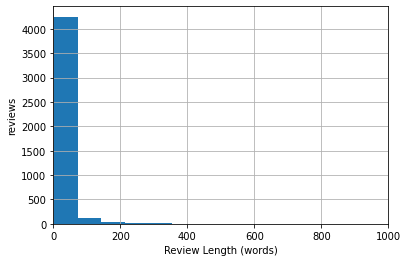

In [36]:
words_per_review = iphone_1["Reviews_no_punc"].apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 50)
plt.xlim(0,1000)
plt.xlabel('Review Length (words)')
plt.ylabel('reviews')
plt.show()

In [37]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 23.150943396226417
Skewness: 28.024718963604883


In [38]:
percent_val = 100 * iphone['Ratings'].value_counts()/len(iphone)
percent_val

5    54.988789
1    24.458146
4    12.686846
3     4.801943
2     3.064275
Name: Ratings, dtype: float64

In [39]:
type(percent_val)

pandas.core.series.Series

In [40]:
ipy=percent_val.to_frame().reset_index().sort_values(by='index')

In [41]:
ipy

,index,Ratings
1,1,24.458146
4,2,3.064275
3,3,4.801943
2,4,12.686846
0,5,54.988789


In [42]:
ipy.rename(columns={'index':'rating','Ratings':'count_rat'},inplace=True)
ipy

,rating,count_rat
1,1,24.458146
4,2,3.064275
3,3,4.801943
2,4,12.686846
0,5,54.988789


<BarContainer object of 5 artists>

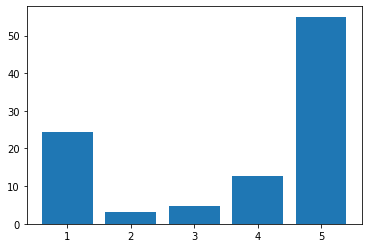

In [43]:
plt.bar(ipy.rating,ipy.count_rat)

In [44]:
# Lowercasing

def tolower(text):
    text=text.lower()
    return text

iphone_1["Lower_cased"] = iphone_1["Reviews_no_punc"].apply(tolower)

In [45]:
# Stopwords Removal

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = set(nltk.corpus.stopwords.words("english"))

def stopwordsremoval(text):
    stop_words_removed = ' '.join([word for word in text.split() if word not in stop])
    
    return stop_words_removed

iphone_1["Stopwords_removed"] = iphone_1["Lower_cased"].apply(stopwordsremoval)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [46]:
iphone_1

,Ratings,Reviews,Reviews_no_punc,Lower_cased,Stopwords_removed
0,5,i received defective iphone 7 32GB silver co...,i received defective iphone 7 32GB silver co...,i received defective iphone 7 32gb silver co...,received defective iphone 7 32gb silver colour...
1,1,Thanks for Amazon service. phone is very nic...,Thanks for Amazon service phone is very nice...,thanks for amazon service phone is very nice...,thanks amazon service phone nice cool also dis...
2,1,"Redmi phones cameras are great, of course iP...",Redmi phones cameras are great of course iPh...,redmi phones cameras are great of course iph...,redmi phones cameras great course iphone bette...
3,5,If you are an apple fan !! This is a true be...,If you are an apple fan This is a true beau...,if you are an apple fan this is a true beau...,apple fan true beauty go
4,5,in 20 days i found my battery health 98% whi...,in 20 days i found my battery health 98 whic...,in 20 days i found my battery health 98 whic...,20 days found battery health 98 disappointing ...
...,...,...,...,...,...
4447,4,Overall performance is very poor,Overall performance is very poor,overall performance is very poor,overall performance poor
4448,5,"Cheating product, product delivers in not wo...",Cheating product product delivers in not wor...,cheating product product delivers in not wor...,cheating product product delivers working cond...
4449,1,Extremely poor battery back up.,Extremely poor battery back up,extremely poor battery back up,extremely poor battery back
4450,5,"Very Good Phone, thank you!",Very Good Phone thank you,very good phone thank you,good phone thank


In [47]:
# Detecting top-12 High Frequency words

words = iphone_1["Stopwords_removed"].to_string().split()
print(words)
print("Number of words in the reviews after removing stopwords - ", len(words))

import itertools
list_iterables = list(itertools.chain(words))
print(list_iterables)

import collections
High_freq_12 = collections.Counter(list_iterables).most_common(12)
print("Top-12-most occuring words are - \n ", High_freq_12)


High_freq_12_df = pd.DataFrame(High_freq_12, columns = ["Top 12 High Frequency words", "No. of Occurances"])
High_freq_12_df


['0', 'received', 'defective', 'iphone', '7', '32gb', 'silver', 'colour...', '1', 'thanks', 'amazon', 'service', 'phone', 'nice', 'cool', 'also', 'dis...', '2', 'redmi', 'phones', 'cameras', 'great', 'course', 'iphone', 'bette...', '3', 'apple', 'fan', 'true', 'beauty', 'go', '4', '20', 'days', 'found', 'battery', 'health', '98', 'disappointing', '...', '5', 'totally', 'disappointed', 'within', 'month', 'paint', 'starte...', '6', 'first', 'one', 'would', 'want', 'know', 'product', 'genuine', 'refu...', '7', 'good', 'specs', 'handle', 'updates', 'next', '4', 'yrs', 'good', 'phon...', '8', 'everything', 'awesome', 'comes', 'iphone', 'surely', 'love', 'da...', '9', 'iphone7', 'hearing', 'problems', '10', 'received', 'defective', 'iphone', '7', '32gb', 'silver', 'colour...', '11', 'thanks', 'amazon', 'service', 'phone', 'nice', 'cool', 'also', 'dis...', '12', 'redmi', 'phones', 'cameras', 'great', 'course', 'iphone', 'bette...', '13', 'apple', 'fan', 'true', 'beauty', 'go', '14', '20', 'da

,Top 12 High Frequency words,No. of Occurances
0,phone,955
1,good,893
2,product,663
3,iphone,524
4,battery,502
5,nice,299
6,...,257
7,apple,250
8,7,247
9,awesome,233


In [48]:
list_12_freq = High_freq_12_df["Top 12 High Frequency words"].tolist()

In [49]:
# Extracting [(Top 12 High Frequency words)-1] as a new list

High_freq_words_removed = [x for x in words if x not in list_12_freq]
print(High_freq_words_removed)

['0', 'received', 'defective', '32gb', 'silver', 'colour...', '1', 'thanks', 'service', 'cool', 'also', 'dis...', '2', 'redmi', 'phones', 'cameras', 'great', 'course', 'bette...', '3', 'fan', 'true', 'beauty', 'go', '4', '20', 'days', 'found', 'health', '98', 'disappointing', '5', 'totally', 'disappointed', 'within', 'month', 'paint', 'starte...', '6', 'first', 'one', 'would', 'want', 'know', 'genuine', 'refu...', 'specs', 'handle', 'updates', 'next', '4', 'yrs', 'phon...', '8', 'everything', 'comes', 'surely', 'love', 'da...', '9', 'iphone7', 'hearing', 'problems', '10', 'received', 'defective', '32gb', 'silver', 'colour...', '11', 'thanks', 'service', 'cool', 'also', 'dis...', '12', 'redmi', 'phones', 'cameras', 'great', 'course', 'bette...', '13', 'fan', 'true', 'beauty', 'go', '14', '20', 'days', 'found', 'health', '98', 'disappointing', '15', 'totally', 'disappointed', 'within', 'month', 'paint', 'starte...', '16', 'first', 'one', 'would', 'want', 'know', 'genuine', 'refu...', '17

In [50]:
# Converting it to string for wordcloud

# High_freq_words_removed_string = 

def listTOstring(list_text):
  Empty_string = " "
  return Empty_string.join(list_text)

High_freq_words_removed_string = listTOstring(High_freq_words_removed)
print("High_freq_words_removed_string = \n", listTOstring(High_freq_words_removed))

High_freq_words_removed_string = 
 0 received defective 32gb silver colour... 1 thanks service cool also dis... 2 redmi phones cameras great course bette... 3 fan true beauty go 4 20 days found health 98 disappointing 5 totally disappointed within month paint starte... 6 first one would want know genuine refu... specs handle updates next 4 yrs phon... 8 everything comes surely love da... 9 iphone7 hearing problems 10 received defective 32gb silver colour... 11 thanks service cool also dis... 12 redmi phones cameras great course bette... 13 fan true beauty go 14 20 days found health 98 disappointing 15 totally disappointed within month paint starte... 16 first one would want know genuine refu... 17 specs handle updates next 4 yrs phon... 18 everything comes surely love da... 19 iphone7 hearing problems 20 exactly one year 1 week ear piece ddnt work we... 21 life device minimal drains fast 4 days... 22 coming oneplus 3 great upgrade always wa... 23 got delivery december 30th bought iphon

In [51]:
## WORD-CLOUD

#!pip install wordcloud

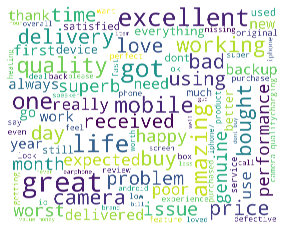

In [52]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=1000, # Width of the canvas
                      height=800 # Height of the canvas
                     ).generate(High_freq_words_removed_string)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

In [55]:
!pip install langdetect

     |████████████████████████████████| 983kB 4.9MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=3a07f370e22a9dfe14acfd656012e0cc80b241c26e00730b550a04acfe36022c
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [56]:
# for language detection
import langdetect

In [57]:
txt = iphone["Reviews"].iloc[0]
print(txt, " --> ", langdetect.detect(txt))

  i received defective iphone 7 32GB silver colour during "Great Indian Festival Sale 2018".Amazon delivered the product in a Day.But Product seems to be non functional. as Rear camera get Freeze due to faulty camera sensor. Just to save the time & money, i bought it from Amazon online E-store. Now Amazon representative, asked me to visit Apple Service store. So far i have wasted my precious time & my mind . The phone was sold by "Sold by Appario Retail Private Ltd " .I'm really fed up till now. expecting Amazon to do quick action against it.  -->  en


In [58]:
import re

In [59]:
iphone_1

,Ratings,Reviews,Reviews_no_punc,Lower_cased,Stopwords_removed
0,5,i received defective iphone 7 32GB silver co...,i received defective iphone 7 32GB silver co...,i received defective iphone 7 32gb silver co...,received defective iphone 7 32gb silver colour...
1,1,Thanks for Amazon service. phone is very nic...,Thanks for Amazon service phone is very nice...,thanks for amazon service phone is very nice...,thanks amazon service phone nice cool also dis...
2,1,"Redmi phones cameras are great, of course iP...",Redmi phones cameras are great of course iPh...,redmi phones cameras are great of course iph...,redmi phones cameras great course iphone bette...
3,5,If you are an apple fan !! This is a true be...,If you are an apple fan This is a true beau...,if you are an apple fan this is a true beau...,apple fan true beauty go
4,5,in 20 days i found my battery health 98% whi...,in 20 days i found my battery health 98 whic...,in 20 days i found my battery health 98 whic...,20 days found battery health 98 disappointing ...
...,...,...,...,...,...
4447,4,Overall performance is very poor,Overall performance is very poor,overall performance is very poor,overall performance poor
4448,5,"Cheating product, product delivers in not wo...",Cheating product product delivers in not wor...,cheating product product delivers in not wor...,cheating product product delivers working cond...
4449,1,Extremely poor battery back up.,Extremely poor battery back up,extremely poor battery back up,extremely poor battery back
4450,5,"Very Good Phone, thank you!",Very Good Phone thank you,very good phone thank you,good phone thank


In [60]:
## TOKENIZATION

import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

iphone_1_a = iphone_1[["Ratings", "Stopwords_removed"]]
iphone_1_a["Tokenized"] = iphone_1["Stopwords_removed"].apply(nltk.word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
iphone_1_a

,Ratings,Stopwords_removed,Tokenized
0,5,received defective iphone 7 32gb silver colour...,"[received, defective, iphone, 7, 32gb, silver,..."
1,1,thanks amazon service phone nice cool also dis...,"[thanks, amazon, service, phone, nice, cool, a..."
2,1,redmi phones cameras great course iphone bette...,"[redmi, phones, cameras, great, course, iphone..."
3,5,apple fan true beauty go,"[apple, fan, true, beauty, go]"
4,5,20 days found battery health 98 disappointing ...,"[20, days, found, battery, health, 98, disappo..."
...,...,...,...
4447,4,overall performance poor,"[overall, performance, poor]"
4448,5,cheating product product delivers working cond...,"[cheating, product, product, delivers, working..."
4449,1,extremely poor battery back,"[extremely, poor, battery, back]"
4450,5,good phone thank,"[good, phone, thank]"


In [62]:
## STEMMING

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

iphone_1_a['Stemmized'] = iphone_1_a["Tokenized"].apply(lambda x: [stemmer.stem(y) for y in x])

iphone_1_a

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Ratings,Stopwords_removed,Tokenized,Stemmized
0,5,received defective iphone 7 32gb silver colour...,"[received, defective, iphone, 7, 32gb, silver,...","[receiv, defect, iphon, 7, 32gb, silver, colou..."
1,1,thanks amazon service phone nice cool also dis...,"[thanks, amazon, service, phone, nice, cool, a...","[thank, amazon, servic, phone, nice, cool, als..."
2,1,redmi phones cameras great course iphone bette...,"[redmi, phones, cameras, great, course, iphone...","[redmi, phone, camera, great, cours, iphon, be..."
3,5,apple fan true beauty go,"[apple, fan, true, beauty, go]","[appl, fan, true, beauti, go]"
4,5,20 days found battery health 98 disappointing ...,"[20, days, found, battery, health, 98, disappo...","[20, day, found, batteri, health, 98, disappoi..."
...,...,...,...,...
4447,4,overall performance poor,"[overall, performance, poor]","[overal, perform, poor]"
4448,5,cheating product product delivers working cond...,"[cheating, product, product, delivers, working...","[cheat, product, product, deliv, work, condit]"
4449,1,extremely poor battery back,"[extremely, poor, battery, back]","[extrem, poor, batteri, back]"
4450,5,good phone thank,"[good, phone, thank]","[good, phone, thank]"


In [63]:
iphone_2 = iphone_1_a[["Ratings", "Stemmized"]]

In [64]:
iphone_2

,Ratings,Stemmized
0,5,"[receiv, defect, iphon, 7, 32gb, silver, colou..."
1,1,"[thank, amazon, servic, phone, nice, cool, als..."
2,1,"[redmi, phone, camera, great, cours, iphon, be..."
3,5,"[appl, fan, true, beauti, go]"
4,5,"[20, day, found, batteri, health, 98, disappoi..."
...,...,...
4447,4,"[overal, perform, poor]"
4448,5,"[cheat, product, product, deliv, work, condit]"
4449,1,"[extrem, poor, batteri, back]"
4450,5,"[good, phone, thank]"


In [65]:
## LEMMATIZATION

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

lemmatizer  = WordNetLemmatizer()
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

iphone_2["Lemmatized"] = iphone_1_a["Stopwords_removed"].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
iphone_2

,Ratings,Stemmized,Lemmatized
0,5,"[receiv, defect, iphon, 7, 32gb, silver, colou...","[received, defective, iphone, 7, 32gb, silver,..."
1,1,"[thank, amazon, servic, phone, nice, cool, als...","[thanks, amazon, service, phone, nice, cool, a..."
2,1,"[redmi, phone, camera, great, cours, iphon, be...","[redmi, phone, camera, great, course, iphone, ..."
3,5,"[appl, fan, true, beauti, go]","[apple, fan, true, beauty, go]"
4,5,"[20, day, found, batteri, health, 98, disappoi...","[20, day, found, battery, health, 98, disappoi..."
...,...,...,...
4447,4,"[overal, perform, poor]","[overall, performance, poor]"
4448,5,"[cheat, product, product, deliv, work, condit]","[cheating, product, product, delivers, working..."
4449,1,"[extrem, poor, batteri, back]","[extremely, poor, battery, back]"
4450,5,"[good, phone, thank]","[good, phone, thank]"


In [67]:
## POS tagged

from nltk.corpus import wordnet

def POS(tokens):

  return nltk.pos_tag(tokens)

iphone_2["(Lemma+POStag)ized"] = iphone_1_a["Tokenized"].apply(POS)

In [68]:
iphone_2

,Ratings,Stemmized,Lemmatized,(Lemma+POStag)ized
0,5,"[receiv, defect, iphon, 7, 32gb, silver, colou...","[received, defective, iphone, 7, 32gb, silver,...","[(received, VBN), (defective, JJ), (iphone, NN..."
1,1,"[thank, amazon, servic, phone, nice, cool, als...","[thanks, amazon, service, phone, nice, cool, a...","[(thanks, NNS), (amazon, VBP), (service, NN), ..."
2,1,"[redmi, phone, camera, great, cours, iphon, be...","[redmi, phone, camera, great, course, iphone, ...","[(redmi, NN), (phones, NNS), (cameras, VBP), (..."
3,5,"[appl, fan, true, beauti, go]","[apple, fan, true, beauty, go]","[(apple, NN), (fan, NN), (true, JJ), (beauty, ..."
4,5,"[20, day, found, batteri, health, 98, disappoi...","[20, day, found, battery, health, 98, disappoi...","[(20, CD), (days, NNS), (found, VBN), (battery..."
...,...,...,...,...
4447,4,"[overal, perform, poor]","[overall, performance, poor]","[(overall, JJ), (performance, NN), (poor, JJ)]"
4448,5,"[cheat, product, product, deliv, work, condit]","[cheating, product, product, delivers, working...","[(cheating, VBG), (product, NN), (product, NN)..."
4449,1,"[extrem, poor, batteri, back]","[extremely, poor, battery, back]","[(extremely, RB), (poor, JJ), (battery, NN), (..."
4450,5,"[good, phone, thank]","[good, phone, thank]","[(good, JJ), (phone, NN), (thank, NN)]"


In [69]:
iphone_2 = iphone_2[["Ratings", "Lemmatized", "(Lemma+POStag)ized"]]

##Sentiment Analysis
#Process initiated after Lemmatization

In [ ]:
#Method 1:
#Assign reviews with Rating>3 as 'Positive'
#Assign reviews with Rating<3 as 'Negative'
#Ignore reviews with Rating == 3, i.e, remove reviews with ratings of 3

In [70]:
iphone_2['Ratings'].value_counts()

5    2415
1    1103
4     567
3     225
2     142
Name: Ratings, dtype: int64

In [71]:
iphone_2_new = iphone_2[iphone_2['Ratings'] != 3]

In [72]:
iphone_2_new['Ratings'].value_counts()

5    2415
1    1103
4     567
2     142
Name: Ratings, dtype: int64

In [73]:
#Create a 'Sentiment'column
iphone_2_new['Sentiment'] = iphone_2_new['Ratings'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
iphone_2_new

,Ratings,Lemmatized,(Lemma+POStag)ized,Sentiment
0,5,"[received, defective, iphone, 7, 32gb, silver,...","[(received, VBN), (defective, JJ), (iphone, NN...",1
1,1,"[thanks, amazon, service, phone, nice, cool, a...","[(thanks, NNS), (amazon, VBP), (service, NN), ...",-1
2,1,"[redmi, phone, camera, great, course, iphone, ...","[(redmi, NN), (phones, NNS), (cameras, VBP), (...",-1
3,5,"[apple, fan, true, beauty, go]","[(apple, NN), (fan, NN), (true, JJ), (beauty, ...",1
4,5,"[20, day, found, battery, health, 98, disappoi...","[(20, CD), (days, NNS), (found, VBN), (battery...",1
...,...,...,...,...
4447,4,"[overall, performance, poor]","[(overall, JJ), (performance, NN), (poor, JJ)]",1
4448,5,"[cheating, product, product, delivers, working...","[(cheating, VBG), (product, NN), (product, NN)...",1
4449,1,"[extremely, poor, battery, back]","[(extremely, RB), (poor, JJ), (battery, NN), (...",-1
4450,5,"[good, phone, thank]","[(good, JJ), (phone, NN), (thank, NN)]",1


In [75]:
#Distribution of Reviews along with their respective sentiment values
iphone_2_new['Sentiment'] = iphone_2_new['Sentiment'].replace({-1 : 'negative'})
iphone_2_new['Sentiment'] = iphone_2_new['Sentiment'].replace({1 : 'positive'})
fig = px.histogram(iphone_2_new, x="Sentiment")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
iphone_2_new.dtypes

Ratings                int64
Lemmatized            object
(Lemma+POStag)ized    object
Sentiment             object
dtype: object

In [ ]:
#iphone_2_new.drop(['Sentiment'], axis = 1, inplace = True)

In [79]:
#Create a 'Sentiment_1' coulumn
iphone_2_new['Sentiment_1'] = iphone_2_new['Ratings'].apply(lambda rating : +1 if rating > 3 else -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
iphone_2_new['Sentiment_1'].value_counts()

 1    2982
-1    1245
Name: Sentiment_1, dtype: int64

In [93]:
iphone_2_new


,Ratings,Lemmatized,(Lemma+POStag)ized,Sentiment,Sentiment_1
0,5,"[received, defective, iphone, 7, 32gb, silver,...","[(received, VBN), (defective, JJ), (iphone, NN...",positive,1
1,1,"[thanks, amazon, service, phone, nice, cool, a...","[(thanks, NNS), (amazon, VBP), (service, NN), ...",negative,-1
2,1,"[redmi, phone, camera, great, course, iphone, ...","[(redmi, NN), (phones, NNS), (cameras, VBP), (...",negative,-1
3,5,"[apple, fan, true, beauty, go]","[(apple, NN), (fan, NN), (true, JJ), (beauty, ...",positive,1
4,5,"[20, day, found, battery, health, 98, disappoi...","[(20, CD), (days, NNS), (found, VBN), (battery...",positive,1
...,...,...,...,...,...
4447,4,"[overall, performance, poor]","[(overall, JJ), (performance, NN), (poor, JJ)]",positive,1
4448,5,"[cheating, product, product, delivers, working...","[(cheating, VBG), (product, NN), (product, NN)...",positive,1
4449,1,"[extremely, poor, battery, back]","[(extremely, RB), (poor, JJ), (battery, NN), (...",negative,-1
4450,5,"[good, phone, thank]","[(good, JJ), (phone, NN), (thank, NN)]",positive,1


In [101]:
iphone_2_new.drop(['Lemmatized', '(Lemma+POStag)ized', 'Sentiment'] , axis = 1  ,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [102]:
iphone_2_new

,Ratings,Sentiment_1
0,5,1
1,1,-1
2,1,-1
3,5,1
4,5,1
...,...,...
4447,4,1
4448,5,1
4449,1,-1
4450,5,1


In [121]:
Sentement = iphone_2_new['Sentiment_1']

In [105]:
iphone_2_new.columns[iphone_2_new.isna().any()]

Index([], dtype='object')

In [136]:
## TRAIN_TEST_SPLIT

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(iphone_2_new,Sentement,test_size = 0.25)

In [137]:
len(x_train)

3170

In [138]:
len(x_test)

1057

In [139]:
len(iphone_2_new)

4227

In [156]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
model = GaussianNB()

In [141]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [142]:
model.score(x_test,y_test)

1.0

In [143]:
x_test[:10]

,Ratings,Sentiment_1
3553,5,1
4227,1,-1
1191,5,1
2813,5,1
2901,4,1
72,5,1
835,5,1
2306,5,1
987,1,-1
3579,5,1


In [144]:
model.predict(x_test)

array([ 1, -1,  1, ...,  1,  1, -1])

In [148]:
pred_mb = model.predict(x_train)
accuracy_mb_train = np.mean(pred_mb == y_train)

In [149]:
accuracy_mb_train

1.0

In [150]:
pred_mb

array([ 1,  1, -1, ..., -1,  1,  1])

In [151]:
pd.crosstab(pred_mb, y_train)

Sentiment_1,-1,1
row_0,,
-1,935,0
1,0,2235


In [152]:
pred_mb_test = model.predict(x_test)
accuracy_mb_test = np.mean(pred_mb_test == y_test)

In [153]:
pred_mb_test 

array([ 1, -1,  1, ...,  1,  1, -1])

In [154]:
accuracy_mb_test

1.0

In [160]:
## BALANCING THE DATASET

Train_majority = x_train[x_train["Sentiment_1"]==1]
Train_minority = x_train[x_train["Sentiment_1"]==-1]

# Upsampling minority class

from sklearn.utils import resample
minority_upsampled = resample(Train_minority, replace=True, 
                                 n_samples = 2239)

# Combine upsampled-minority-class with majority class --> the crux of balancing dataset

Train_upsampled = pd.concat([Train_majority, minority_upsampled])

In [162]:
Balanced = Train_upsampled

In [163]:
Balanced

,Ratings,Sentiment_1
3405,5,1
3599,5,1
2712,5,1
3879,4,1
3857,5,1
...,...,...
57,1,-1
944,1,-1
3100,1,-1
3266,1,-1


#Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
#cv.fit_transform([listToStr])

In [ ]:
#Coverting list to string as lower() is a function that cannot be executed by list[] 
#s = iphone_2_new["Stemmized"]
  
# using list comprehension
#iphone_2_new.listToStr = ' '.join(map(str, s))
  
#print(listToStr) 

In [ ]:
iphone_2_new['Sentiment_1']

In [ ]:
#cv.vocabulary_
#Total number of words along with their appearances

In [ ]:
#len(cv.get_feature_names())

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt
#%matplotlib inline
#sns.displot(iphone_2_new['Sentiment_1'])

In [ ]:
import seaborn as sns
sns.distplot(iphone_2_new['Sentiment_1'])

In [ ]:
#Using CountVectorizer() to generate DTM(Document-Term Matrix)that can be used for model evaluation
#from sklearn.feature_extraction.text import CountVectorizer
#from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
#token = RegexpTokenizer(r'[a-zA-Z0-9]+')
#cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
#text_counts= cv.fit_transform([listToStr])

In [ ]:
#!pip install textblob

In [ ]:
#from textblob import TextBlob

In [ ]:
#x = TextBlob(listToStr)

In [ ]:
#x.sentiment

In [ ]:
#def TextBlobfn(text):
  #return TextBlob(text).sentiment

#st_df = pd.DataFrame(iphone_2_new['Stemmized'])

#iphone_2_new['TextBlob'] = st_df.transform(lambda text: TextBlobfn)



#tb = iphone_2_new['Stemmized'].apply(lambda x: TextBlobfn(x))
#result = map(TextBlobfn, iphone_2_new['Stemmized'])
#print(result)


In [ ]:
#print(string(result))

In [ ]:
#import functools
#result1 = functools.reduce(lambda iphone_2_new['Stemmized']:
                           #TextBlob(text).sentiment)
#print(result1)

In [ ]:
#print(result)

In [ ]:
#result = map(TextBlobfn, iphone_2_new['Stemmized'])
#result

In [ ]:
#type(result)

#Plotting

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
iphone_2_new['Sentiment_1'].value_counts()

#Violin Plot

In [ ]:
fig, ax = plt.subplots(figsize =(9, 7))
sns.violinplot(ax = ax,  y = iphone_2_new['Sentiment_1'], color = 'cornflowerblue' )

#Distribution Plot

In [ ]:
sns.distplot(iphone_2_new['Sentiment_1'], color = 'purple')

#Barplot

In [ ]:
iphone_2_new['Sentiment_1'].value_counts().plot.bar()

#Area Plot

In [ ]:
iphone_2_new['Sentiment_1'].value_counts().plot.area()

#Histogram

In [ ]:
iphone_2_new['Sentiment_1'].value_counts().plot.hist()

#Count Plot

In [ ]:
sns.countplot(x ='Sentiment_1', data = iphone_2_new)